# 1 - Moments and Statistics

## 1.1 - Moments

Moments are a fundamental concept in statistics and probability theory. They provide a way to summarize and describe the properties of a distribution. The nth moment of a random variable X is defined as the expected value of X^n.
 
 1. The expected value (or mean) of a random variable is the first moment. It is calculated by summing the products of each possible value of the random variable and its probability.
    Mathematical expression: E[X] = ∑(x * P(X = x)) for discrete variables, or ∫(x * f(x) dx) for continuous variables

 2. The variance is the second central moment, calculated as the expected value of the squared deviation from the mean. It measures the spread or dispersion of the data.
    Mathematical expression: Var(X) = E[(X - μ)²] = E[X²] - (E[X])²

 3. The skewness is a measure of the asymmetry of the distribution. It is calculated as the third central moment divided by the cube of the standard deviation. 
    Mathematical expression: Skewness = E[((X - μ) / σ)³] = E[(X - μ)³] / (E[(X - μ)²])^(3/2)
 
 4. The kurtosis is a measure of the "tailedness" of the distribution. It is calculated as the fourth central moment divided by the fourth power of the standard deviation.
    Mathematical expression: Kurtosis = E[((X - μ) / σ)⁴] = E[(X - μ)⁴] / (E[(X - μ)²])²
 
 These moments provide important information about the shape and behavior of a distribution, and they are used in various statistical analyses and modeling techniques.




Empirical vs Theoretical Moments:
Mean: -0.0016 vs 0
Variance: 1.0004 vs 1
Skewness: -0.0014 vs 0
Kurtosis: 2.9944 vs 3


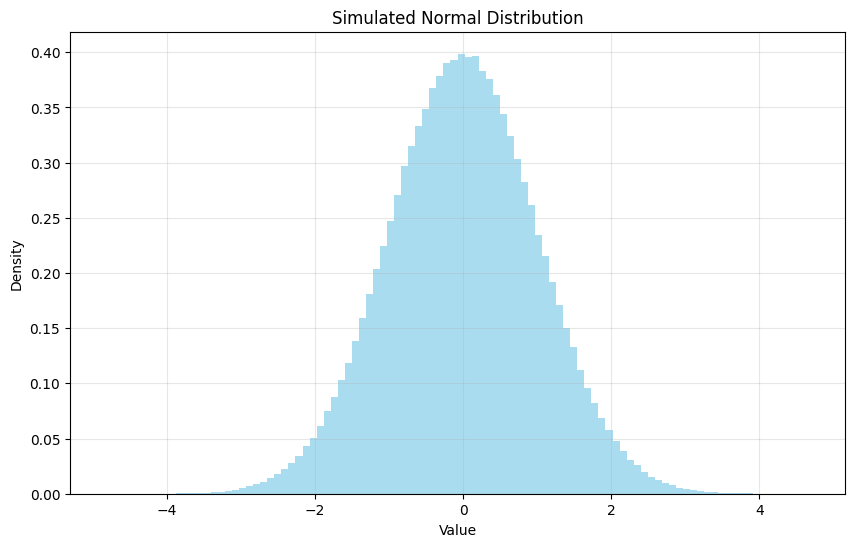

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate a large sample from a normal distribution
sample_size = 1000000
mu, sigma = 0, 1  # mean and standard deviation
samples = np.random.normal(mu, sigma, sample_size)

# Calculate empirical moments
empirical_mean = np.mean(samples)
empirical_variance = np.var(samples)
empirical_skewness = stats.skew(samples)
empirical_kurtosis = stats.kurtosis(samples, fisher=False)

# Theoretical moments for normal distribution
theoretical_mean = mu
theoretical_variance = sigma**2
theoretical_skewness = 0
theoretical_kurtosis = 3

# Print results
print("Empirical vs Theoretical Moments:")
print(f"Mean: {empirical_mean:.4f} vs {theoretical_mean}")
print(f"Variance: {empirical_variance:.4f} vs {theoretical_variance}")
print(f"Skewness: {empirical_skewness:.4f} vs {theoretical_skewness}")
print(f"Kurtosis: {empirical_kurtosis:.4f} vs {theoretical_kurtosis}")

# Visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=100, density=True, alpha=0.7, color='skyblue')
plt.title("Simulated Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()


As we can see, the normal distribution has a skewness of 0 and kurtosis of 3. This is because the normal distribution is symmetric and has a bell-shaped curve (the tails are symmetric and the mean, median, and mode are all equal). 



Chi-square Distribution - Empirical vs Theoretical Moments:
Mean: 5.0022 vs 5
Variance: 10.0190 vs 10
Skewness: 1.2706 vs 1.2649
Kurtosis: 5.4383 vs 5.4000


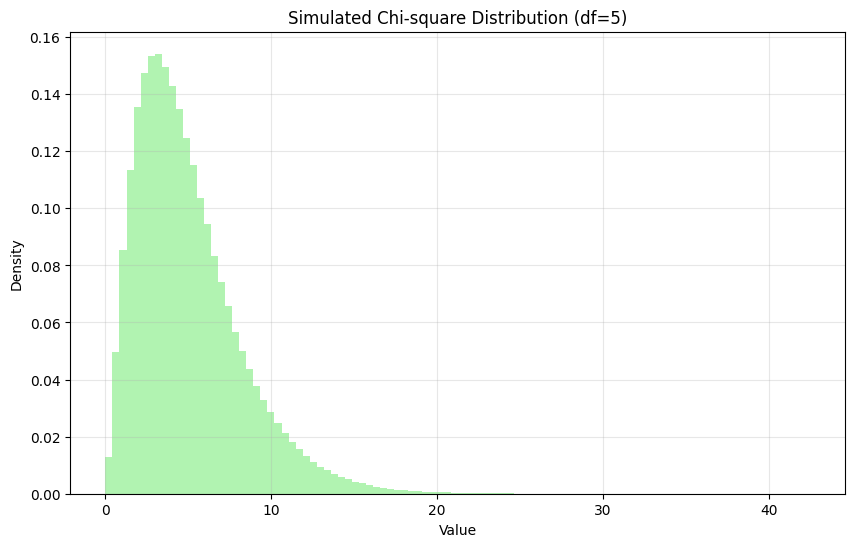

In [22]:
# Generate a sample from a chi-square distribution (which has non-zero skewness and kurtosis)
df = 5  # degrees of freedom
sample_size = 1000000
samples_chi2 = np.random.chisquare(df, sample_size)

# Calculate empirical moments for chi-square distribution
empirical_mean_chi2 = np.mean(samples_chi2)
empirical_variance_chi2 = np.var(samples_chi2)
empirical_skewness_chi2 = stats.skew(samples_chi2)
empirical_kurtosis_chi2 = stats.kurtosis(samples_chi2, fisher=False)

# Theoretical moments for chi-square distribution
theoretical_mean_chi2 = df
theoretical_variance_chi2 = 2 * df
theoretical_skewness_chi2 = np.sqrt(8 / df)
theoretical_kurtosis_chi2 = (12 / df) +3

# Print results for chi-square distribution
print("\nChi-square Distribution - Empirical vs Theoretical Moments:")
print(f"Mean: {empirical_mean_chi2:.4f} vs {theoretical_mean_chi2}")
print(f"Variance: {empirical_variance_chi2:.4f} vs {theoretical_variance_chi2}")
print(f"Skewness: {empirical_skewness_chi2:.4f} vs {theoretical_skewness_chi2:.4f}")
print(f"Kurtosis: {empirical_kurtosis_chi2:.4f} vs {theoretical_kurtosis_chi2:.4f}")

# Visualize the chi-square distribution
plt.figure(figsize=(10, 6))
plt.hist(samples_chi2, bins=100, density=True, alpha=0.7, color='lightgreen')
plt.title(f"Simulated Chi-square Distribution (df={df})")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()


In the case of the chi-square distribution, we can see that the skewness is not 0 and kurtosis is greater than 3. This is because the chi-square distribution is not symmetric and has a skewed and "tailed" shape.

Having positive skewness means that the distribution is skewed to the right (has a longer right tail). Having a negative skewness means that the distribution is skewed to the left (has a longer left tail).

Having a kurtosis greater than 3 means that the distribution has "fatter" tails compared to a normal distribution. 





## 1.2 Example using crypto ohlcv data

We will download BTCUSDT ohlcv data from the binance API and calculate the moments of the price changes.

In [16]:
import pandas as pd
df = pd.read_csv("data/BTC_USDT_5m.csv", sep=";")
df.describe()

,open,high,low,close,volume
count,77873.000000,77873.000000,77873.000000,77873.000000,77873.000000
mean,59963.315591,60022.174073,59902.481437,59963.618128,125.207333
std,8659.948113,8667.737088,8651.719600,8659.743043,167.926663
min,38584.330000,38657.440000,38555.000000,38584.330000,2.166770
25%,56731.990000,56801.000000,56674.000000,56732.000000,42.851940
50%,62334.010000,62417.230000,62261.100000,62334.370000,76.778940
75%,66576.010000,66632.960000,66512.450000,66576.000000,144.031040
max,73628.430000,73777.000000,73575.340000,73628.420000,4422.427610


Moments of BTCUSDT log returns:
Mean: 0.0000
Variance: 0.0000
Skewness: -0.6726
Kurtosis: 33.4893


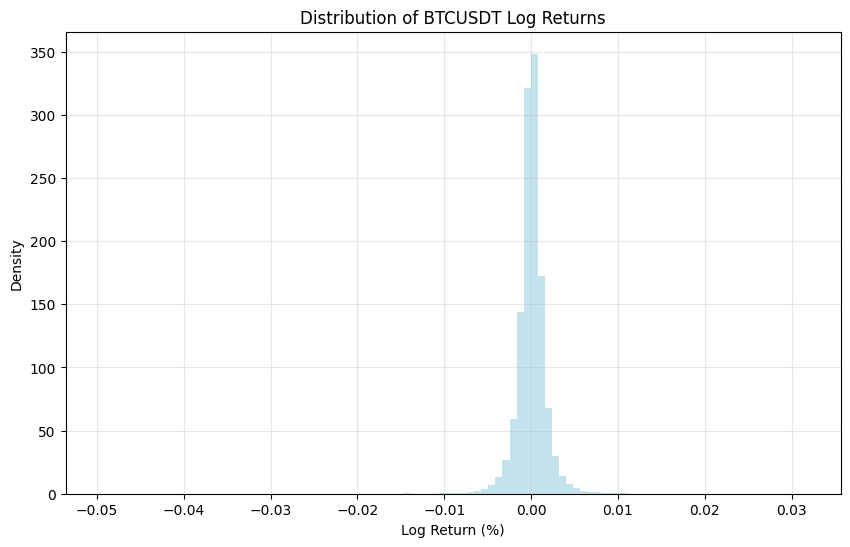

In [17]:
# Calculate price changes
df['price_change'] = df['close'].pct_change() * 100

# Calculate log returns
df['log_return'] = np.log(df['close'] / df['close'].shift(1))

# Calculate moments
mean_price_change = df['log_return'].mean()
variance_price_change = df['log_return'].var()
skewness_price_change = df['log_return'].skew()
kurtosis_price_change = df['log_return'].kurtosis()

# Print moments
print("Moments of BTCUSDT log returns:")
print(f"Mean: {mean_price_change:.4f}")
print(f"Variance: {variance_price_change:.4f}")
print(f"Skewness: {skewness_price_change:.4f}")
print(f"Kurtosis: {kurtosis_price_change:.4f}")

# Plot the distribution of price changes
plt.figure(figsize=(10, 6))
plt.hist(df['log_return'], bins=100, density=True, alpha=0.7, color='lightblue')
plt.title("Distribution of BTCUSDT Log Returns")
plt.xlabel("Log Return (%)")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()


We see that the log returns are not normally distributed, they are leptokurtic (fat tails) and skewed to the left. 

This is a characteristic of financial asset returns, which are often modeled using Lévy distributions.

Lévy distributions are a type of heavy-tailed distribution that are often used to model financial asset returns. They are named after the French mathematician Paul Lévy, who first described them in the early 20th century.

Lévy distributions are characterized by their heavy tails, which means that they have a higher probability of extreme values (both very large and very small) than a normal distribution. This is in contrast to the normal distribution, which has a finite variance and decays exponentially as the values move away from the mean.

The Lévy distribution is a continuous probability distribution that is defined by a single parameter, called the Lévy index or characteristic exponent. The Lévy index determines the shape of the distribution and can take any positive value. As the Lévy index increases, the distribution becomes more heavy-tailed and exhibits more pronounced extreme values.



## 1.3 Fat tailedness
Fat tailedness does not just means that extreme values are more likely, it means that tail events have more weight than events in the center of the distribution. That is, the probability of observing extreme values is higher than what a normal distribution would predict. And the probability of small deviations is lower than what a normal distribution would predict.

# 2 - Z-score

The Z-score is a measure of how many standard deviations an observation is from the mean. It is calculated as:

Z = (X - μ) / σ

where X is the observation, μ is the mean, and σ is the standard deviation.




Moments of the Z-score distribution:
Mean: 0.0000
Standard Deviation: 1.0000
Skewness: -0.6726
Kurtosis: 33.4893


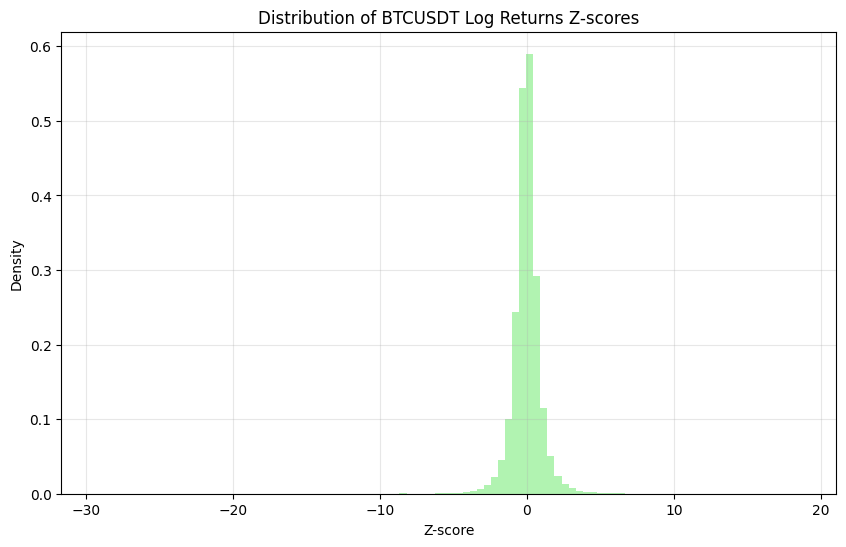

In [18]:
# Calculate Z-scores for log returns
df['z_score'] = (df['log_return'] - df['log_return'].mean()) / df['log_return'].std()

# Calculate moments of the Z-score distribution
mean_z = df['z_score'].mean()
std_z = df['z_score'].std()
skew_z = df['z_score'].skew()
kurtosis_z = df['z_score'].kurtosis()

print("Moments of the Z-score distribution:")
print(f"Mean: {mean_z:.4f}")
print(f"Standard Deviation: {std_z:.4f}")
print(f"Skewness: {skew_z:.4f}")
print(f"Kurtosis: {kurtosis_z:.4f}")

# Plot the distribution of Z-scores
plt.figure(figsize=(10, 6))
plt.hist(df['z_score'], bins=100, density=True, alpha=0.7, color='lightgreen')
plt.title("Distribution of BTCUSDT Log Returns Z-scores")
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()


After normalizing the log returns by the standard deviation, the resulting distribution (Z-score) has a mean of 0 and a standard deviation of 1. 

However, the Z-score distribution is still not normally distributed, it is still fat tailed.